In [1]:
import numpy as np

In [2]:
#Question 1. Create the following vectors/matrices: 
#a = [0,0,0,0,0], 
#b = 3x5 matrix filled with ones, 
#c = [1,2,3,4,5,6], 
#d = [0, 0.2, 0.4, 0.6, 0.8, 1], 
#e = array of 5 random numbers between 1 and 2
#f = 2x3 matrix with all elements equal to 5

a = np.zeros(5)
b = np.ones([3, 5])
c = np.arange(1, 7, 1)
d = np.linspace(0, 1, 6)
e = np.random.rand(5) + 1
f = np.ones([2, 3]) * 5

#Another method for f 
# f2a = np.repeat(5,3)
# f2b = np.repeat(5,3)
# f2 = np.vstack((f2a,f2b))

In [3]:
print(a)

[0. 0. 0. 0. 0.]


In [4]:
print(b)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [5]:
print(c)

[1 2 3 4 5 6]


In [6]:
print(d)

[0.  0.2 0.4 0.6 0.8 1. ]


In [7]:
print(e)

[1.28606433 1.75185463 1.60140142 1.72377503 1.68625645]


In [8]:
print(f)

[[5. 5. 5.]
 [5. 5. 5.]]


---

In [9]:
#Question 2a: Generate following matrix M using the given two arrays x and y 
#[[ 5 11]
#[ 9  2]]

x=np.array([5,9])
y=np.array([11,2])

M = np.vstack([x, y]).T
print(M)

[[ 5 11]
 [ 9  2]]


In [10]:
#Question 2b: Calculate matrix P = M * N (Matrix multiplication)
#Matrix N =  [1 2]
#            [5 7]
N = np.array([
    [1, 2],
    [5, 7]
])
P = M.dot(N)
print(P)

[[60 87]
 [19 32]]


In [11]:
#Question 2c: Compute the maximum value of each row in P
RowMax = np.max(P, axis = 1)
print(RowMax)

[87 32]


In [12]:
#Question 2c: Compute the maximum element in P
Max = np.max(P)
print(Max)

87


---

In [13]:
#Question 3a: Define a function "addOne", take in one number as input and add one to it.
def addOne(x):
    x += 1
    return x
print(addOne(11))

12


In [14]:
#Question 3b: 
a = [1, 2, 3]
b = a
b[1] = 9

print(a)
print(b)

[1, 9, 3]
[1, 9, 3]


---

### Think: Why is "a" modified when we modify 'b'?

`b = a` only assigns a reference to the same object, so modifying `b` changes the shared memory, affecting `a`.

---

In [15]:
#preform a copy of 'a'
a = [1, 2, 3]
b1 = a.copy()

In [16]:
b1[1] = 9
print(b1)
print(a)

[1, 9, 3]
[1, 2, 3]


---

### Think: Why is 'a' unchanged?

`.copy()` creates a new object, so modifying `b1` does not affect `a` because they are independent in memory.


---

In [17]:
#Question 3c: 
c = np.array([9, [1, 3], ['m', 'n']], dtype = 'object')
d = np.copy(c)
d[1][0] = 7

print(c)
print(d)

[9 list([7, 3]) list(['m', 'n'])]
[9 list([7, 3]) list(['m', 'n'])]


---

### Think: Why is "c" modified when we modify 'd'?

Because `.copy()` performs a shallow copy for object arrays. <br>
The list elements in the array are mutable objects, so `c` and `d` share the same references.<br>
Modifying one affects the other.

---

In [18]:
import copy as cp
#Question 3d: perform a deep copy of c
c = np.array([9, [1, 3], ['m', 'n']], dtype = 'object')

d1 = cp.deepcopy(c)

In [19]:
d1[1][0] = 7
print(d1)
print(c)

[9 list([7, 3]) list(['m', 'n'])]
[9 list([1, 3]) list(['m', 'n'])]


---

### Think: Why is 'c' unchanged?

Because `deepcopy` creats a completely independent copy, including all nested objects.<br>


---

In [20]:
#Question 4: define a lambda function, calculating the square of the input.
square = lambda x: x ** 2
print(square(5))

25


---

In [21]:
#Question 5a: find the machine precision:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



Machine precision: 
`eps = 2.2204460492503131e-16`

In [22]:
#Question 5b:
print(np.spacing(1))
print(np.spacing(99999999999999))

2.220446049250313e-16
0.015625


---

### Think: Why is spacing much larger for bigger numbers?

`np.spaceing(x)` returns the distance between a floating-point number `x` and its nearest representable neighbor.

The space between numbers is proportional to, for 64 bits, `2^(exponent - 52)`.

For small numbers, the exponent is small, resulting in tiny spacing.<br>
For large numbers, the exponent is large, causing much larger spacing.

---

In [23]:
#Question 5c: 
v = np.array([1, 0.0003, 999, 2311465132, 567], dtype = np.float32)
print(v[3])

2.3114652e+09


---

### Think: why is the result 2311465200 instead of 2311465132?

Because `np.float32` has only about 7 significant digits.<br>
The number exceeds this precision and gets rounded to the nearest representable value.


---

In [24]:
#Question 5d: Add up all the elements in v so that the result is the most accruate. You may add them up manually.
vsum = v[1] + v[0] + v[4] + v[2] + v[3]
print(vsum)

2.3114668e+09


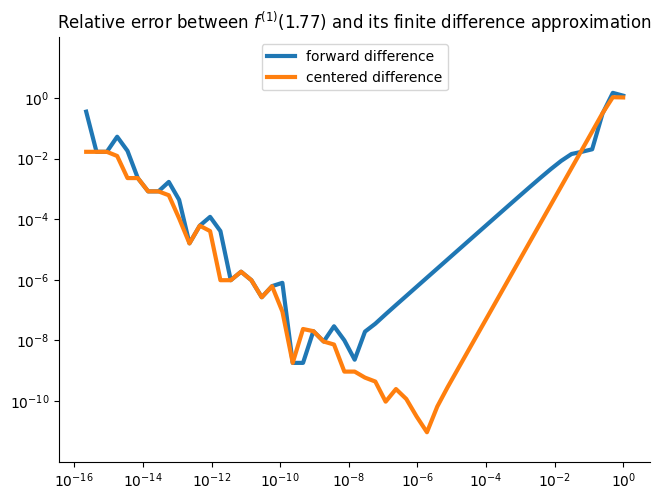

In [25]:
# Question 6: approximate the 1st order derivative of:
# f(x) = cos(x^2) - sin(e^x)
import matplotlib.pyplot as plt
import numpy as np

x = 1.77
h = 2.0 ** np.arange(-52, 1, 1)

def f(x):
    return np.cos(x ** 2) - np.sin(np.exp(x))
def f1(x):
    return - np.sin(x ** 2) * 2 * x - np.cos(np.exp(x)) * np.exp(x)
(f_x, f1_x, f_x_plus_h, f_x_minus_h) = (f(x), f1(x), f(x+h), f(x-h))

#Complete your code below
f1_forward_diff = (f_x_plus_h - f_x) / h
f1_centered_diff = (f_x_plus_h - f_x_minus_h) / (2 * h)

### Plotting the relative error of the finite-difference approximations
fig, ax = plt.subplots(1)
ax.loglog(h,np.abs((f1_forward_diff - f1_x) / f1_x), label='forward difference', linewidth=3)
ax.loglog(h,np.abs((f1_centered_diff - f1_x) / f1_x), label='centered difference', linewidth=3)
ax.set_xticks(10.0**np.arange(-16,1,2))
ax.set_yticks(10.0**np.arange(-10,1,2))
ax.set_ylim([10**(-12),100.0])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Relative error between $f^{(1)}('+str(x)+')$ and its finite difference approximation')
ax.legend(loc='upper center')   
fig.tight_layout(pad=0)
plt.subplots_adjust()
plt.show()
